<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 7: Practical - Decision Tree and Ensembles <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani Bonab - Arman Malekzadeh
    
____

### Full Name : Pardis Zahraei
### Student Number : 99109777
### Colab Link:https://colab.research.google.com/drive/18z2RadzBQkWhHgFlv6PqePX-USOlS7-x?usp=sharing
___

**About the Dataset:**


Measurements of geometrical properties of kernels belonging to three different varieties of wheat.

A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

**Data Set Information:**


The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

To construct the data, seven geometric parameters of wheat kernels were measured:

- area A,
- perimeter P,
- compactness C = 4piA/P^2,
- length of kernel,
- width of kernel,
- asymmetry coefficient
- length of kernel groove.

The target column is "Type".

The data set can be used for the tasks of classification and cluster analysis.

https://archive.ics.uci.edu/ml/datasets/seeds

In [175]:
# you can use the following packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from random import choices
import math

## P1: Explore the Dataset

In [176]:
!wget -O dataset.csv https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1

--2023-06-05 18:41:53--  https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv [following]
--2023-06-05 18:41:53--  https://www.dropbox.com/s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc910e7bd20bc424e0eed39fc4ae.dl.dropboxusercontent.com/cd/0/get/B9YNYo6lF85KLLDTT8aJeKi1vvE-o9Wm20gWmT5rtsRsjqRR9BrjH5AdR_BQUuQ0iKBo_b2gVcRfUUJIOw7jqZXRxDVJqlCzIkMgZwrDozP1bzs-UOriPzsm0HKDG1ApKIC9xQFxkUw0t7uZvELAB0mCCB-PFCIsXZssBXbuDIZU7YUKJUBwZOdKDmIDfrhGLX8/file?dl=1# [following]
--2023-06-05 18:41:54--  https://uc910e7bd20bc424e0eed39fc4ae.dl.dropboxusercontent.com/cd/0/get/B9YNYo6lF85KLLDTT8aJeKi1vvE-o9Wm20gW

Load the dataset as a dataframe

In [177]:
df = pd.read_csv('dataset.csv')

Check if there are any missing values (and remove them) **(P1-1: 2 points)**

In [178]:
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64
Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64


Plot the heatmap of the correlation matrix between features **(P1-2: 3 points)**

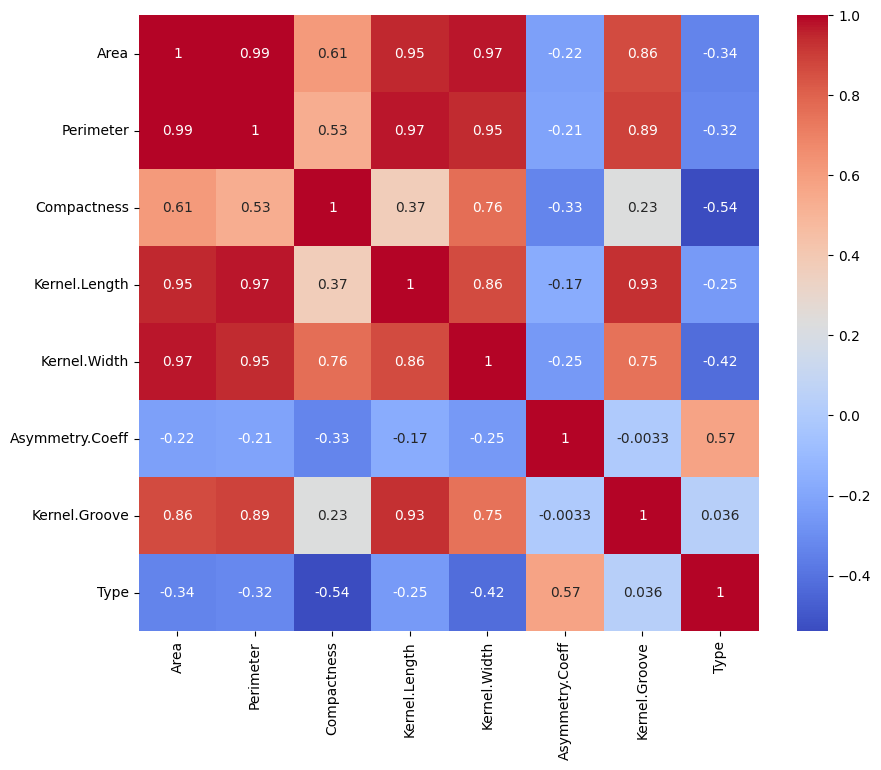

In [179]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Remove features which are highly correlated (> 95%) with the other ones **(P1-3: 5 points)**

In [180]:
corr_matrix = df.corr().abs()
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)
df_new = df.drop(high_corr_features, axis=1)
print(df_new)

      Area  Compactness  Asymmetry.Coeff  Kernel.Groove  Type
0    15.26       0.8710            2.221          5.220     1
1    14.88       0.8811            1.018          4.956     1
2    14.29       0.9050            2.699          4.825     1
3    13.84       0.8955            2.259          4.805     1
4    16.14       0.9034            1.355          5.175     1
..     ...          ...              ...            ...   ...
194  12.19       0.8783            3.631          4.870     3
195  11.23       0.8511            4.325          5.003     3
196  13.20       0.8883            8.315          5.056     3
197  11.84       0.8521            3.598          5.044     3
198  12.30       0.8684            5.637          5.063     3

[199 rows x 5 columns]


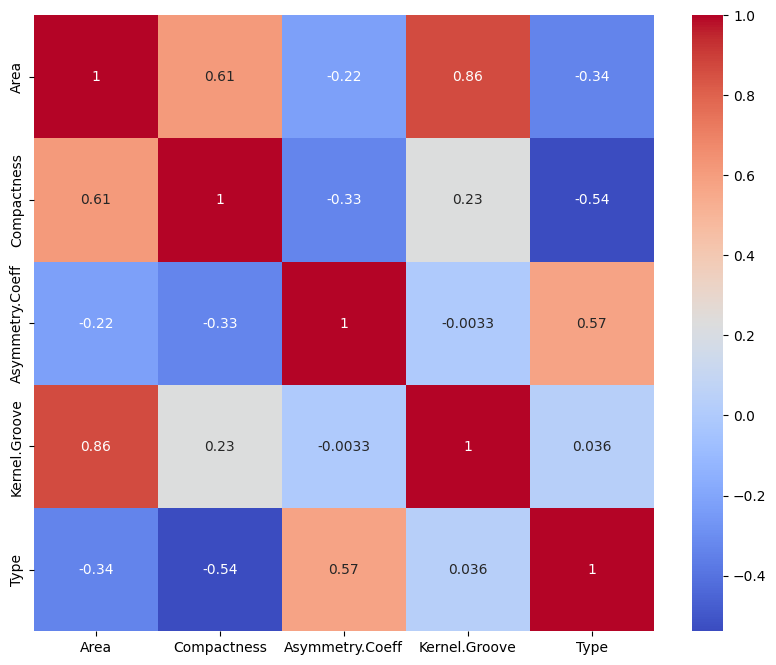

In [181]:
correlation_matrix = df_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Check for imbalance between classes **(P1-4: 3 points)**

In [182]:
class_counts = df_new['Type'].value_counts()
print(class_counts / len(df_new) * 100)

2    34.170854
1    33.165829
3    32.663317
Name: Type, dtype: float64


## P2: Prepare the Training Data

Convert features and the target into numpy arrays **(P2-1: 2 points)**

In [183]:
features = df_new.drop('Type', axis=1).values
target = df_new['Type'].values

Split the samples into training (80%) and testing (20%) arrays **(P2-2: 5 points)**

In [184]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## P3: Decision Tree Implementation

Implement desicion tree for classification from scratch **(P3-1: 20 points)**

In [185]:
# new version based on sklearn implementaion of tree

class DecisionTree:
     
    def __init__(self, criterion="entropy", max_depth=None):
        """
        Parameters:
        
        criterion -- "gini" for the Gini impurity and "entropy" for the Information Gain. (default "entropy")
        max_depth -- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure. (default=None)
        """
        self.criterion = criterion
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y):
        """
        Build a decision tree classifier from the training set (X, y).

        Returns:
        self : Fitted estimator
        """
        self.tree = self.build_tree(X, y, depth=0)
        return self
    
    def predict(self, X):
        """
        Predict class value for X.

        Returns:
        y : The predicted classes
        """
        y_pred = []
        for x in X:
            node = self.tree
            while 'class' not in node:
                feature_value = x[node['feature_idx']]
                if feature_value <= node['threshold']:
                    node = node['left']
                else:
                    node = node['right']
            y_pred.append(node['class'])
        return np.array(y_pred)
    
    def build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return {'class': max(set(y.tolist()), key=y.tolist().count)}
        n_samples, n_features = X.shape
        best_info_gain = -1
        best_feature_idx = None
        best_threshold = None
        for feature_idx in range(n_features):
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)
            if len(unique_values) > 1:
                thresholds = (unique_values[:-1] + unique_values[1:]) / 2
                for threshold in thresholds:               
                    if self.criterion == "gini":
                        class_counts = np.bincount(y)
                        class_probs = class_counts / len(y)
                        parent_impurity = 1 - np.sum(class_probs**2)
                    else:
                        class_counts = np.bincount(y)
                        class_probs = class_counts / len(y)
                        parent_impurity = -np.sum(class_probs * np.log2(class_probs + 1e-10))
                    left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                    right_indices = np.where(X[:, feature_idx] > threshold)[0]
                    if self.criterion == "gini":
                        class_counts = np.bincount(y[left_indices])
                        class_probs = class_counts / len(y[left_indices])
                        left_impurity = 1 - np.sum(class_probs**2)
                        class_counts = np.bincount(y[right_indices])
                        class_probs = class_counts / len(y[right_indices])
                        right_impurity = 1 - np.sum(class_probs**2)
                    else:
                        class_counts = np.bincount(y[left_indices])
                        class_probs = class_counts / len(y[left_indices])
                        left_impurity = -np.sum(class_probs * np.log2(class_probs + 1e-10))
                        class_counts = np.bincount(y[right_indices])
                        class_probs = class_counts / len(y[right_indices])
                        right_impurity = -np.sum(class_probs * np.log2(class_probs + 1e-10))
                    info_gain = parent_impurity -( (len(left_indices) / len(y)) * left_impurity + (len(right_indices) / len(y)) * right_impurity)
                    if info_gain > best_info_gain:
                        best_info_gain = info_gain
                        best_feature_idx = feature_idx
                        best_threshold = threshold    
        if best_feature_idx is None:
            return {'class': max(set(y.tolist()), key=y.tolist().count)}
        left_indices = np.where(X[:, best_feature_idx] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature_idx] > best_threshold)[0]
        left_subtree = self.build_tree(X[left_indices], y[left_indices], depth+1)
        right_subtree = self.build_tree(X[right_indices], y[right_indices], depth+1)
        return {'feature_idx': best_feature_idx,
                'threshold': best_threshold,
                'left': left_subtree,
                'right': right_subtree}

Define two decision trees with two different criteria **(P3-2: 3 points)**

In [186]:
tree_entropy = DecisionTree(criterion="entropy")
tree_gini = DecisionTree(criterion="gini")

Fit the defined decision trees on training samples **(P3-3: 2 points)**

In [187]:
tree_entropy.fit(X_train, y_train)
tree_gini.fit(X_train, y_train)

Get the results on the test set **(P3-4: 5 points)**

In [188]:
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_gini = tree_gini.predict(X_test)

Train the decision trees, considering the values [1,2,3,4,5] as the maximum depth **(P3-5: 5 points)**

In [189]:
max_depth_values = [1, 2, 3, 4, 5]
trees = []

for max_depth in max_depth_values:
    tree = DecisionTree(max_depth=max_depth)
    tree.fit(X_train, y_train)
    trees.append(tree)

Compare the accuracy score of the decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees. **(P3-6: 5 points)**

In [190]:
from sklearn.metrics import accuracy_score
tree_no_limit = DecisionTree()
tree_no_limit.fit(X_train, y_train)
y_pred_no_limit = tree_no_limit.predict(X_test)
accuracy_no_limit = accuracy_score(y_test, y_pred_no_limit)
print("Accuracy without limiting maximum depth:", accuracy_no_limit)
max_depth_values = [1, 2, 3, 4, 5]
accuracy_scores = []
for max_depth in max_depth_values:
    tree = DecisionTree(max_depth=max_depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy with maximum depth", max_depth, ":", accuracy)


Accuracy without limiting maximum depth: 0.85
Accuracy with maximum depth 1 : 0.675
Accuracy with maximum depth 2 : 0.9
Accuracy with maximum depth 3 : 0.8
Accuracy with maximum depth 4 : 0.85
Accuracy with maximum depth 5 : 0.85


first it shows that we can have an overfitting if we dont limit the max depth and the best accuracy comes from depth 2 rather than larger depths which shows the best depth for our model so using a large or small number may not result in good accuracy but the balanced one which dosent overfit or underfit

## P4: Ensemble Models

### P4-1: Bagging

Implement the bagging algorithm for classification from scratch **(P4-1-1: 15 points)**

In [201]:
import numpy as np

class BaggingDecisionTree:
     
    def __init__(self, bootstraped_training_num=50, predictors_num=50):
        """
        Parameters:
        
        bootstraped_training_num -- The number of training sets we are gonna have
        predictors_num -- The number of predictors we want to use for each test sample
        """
        self.bootstraped_training_num = bootstraped_training_num
        self.predictors_num = predictors_num
        self.classifiers = []
    
    def fit(self, X, y):
        """
        Create `self.bootstraped_training_num` training sets by random sampling of the input training elements with replacement.
        Then create the same number of classifiers and fit each classifier on the corresponding training set.
        
        Parameters:
        X : training features array
        y : target array
        
        Returns:
        self : Fitted estimator
        """
        n_samples = X.shape[0]
        for _ in range(self.bootstraped_training_num):
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_train = X[indices]
            y_train = y[indices]    
            classifier = DecisionTree()
            classifier.fit(X_train, y_train)
            self.classifiers.append(classifier)
        
        return self
    
    def predict(self, X):
        """
        Predict class value for X using majority voting of `self.predictors_num` classifiers.

        Parameters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """
        n_samples = X.shape[0]
        predictions = np.zeros((n_samples, self.bootstraped_training_num))
        for i, classifier in enumerate(self.classifiers):
            predictions[:, i] = classifier.predict(X)
        y_pred = []
        for i in range(n_samples):
            unique, counts = np.unique(predictions[i], return_counts=True)
            majority_vote = unique[np.argmax(counts)]
            y_pred.append(majority_vote)
        
        return np.array(y_pred)


Create an instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=50` and fit it on the training data **(P4-1-2: 3 points)**

In [202]:
bagging = BaggingDecisionTree(bootstraped_training_num=50, predictors_num=50)
bagging.fit(X_train, y_train)

Create another instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=7` and fit it on the training data **(P4-1-3: 2 points)**

In [203]:
bagging_2 = BaggingDecisionTree(bootstraped_training_num=50, predictors_num=7)
bagging_2.fit(X_train, y_train)

Test the created models on the test set. Discuss differences of two approaches we adopted. **(P4-1-4: 5 points)**

In [204]:
y_pred_1 = bagging.predict(X_test)
y_pred_2 = bagging_2.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred_1)
accuracy2 = accuracy_score(y_test, y_pred_2)
print("acc1: ",accuracy1)
print("acc2: ",accuracy2)

acc1:  0.925
acc2:  0.875


The higher the number of bootstraped training sets, the more diverse the training sets, which can lead to improved model generalization.
Using a higher number of predictors can increase the robustness of the ensemble model by considering a larger variety of predictions. However, it can also increase computational complexity.
The second approach may have a slightly reduced accuracy due to the limited number of predictors.

### P4-2: Boosting

Implement the Adaboost algorithm for classification from scratch **(P4-2-1: 10 points)**

In [195]:
# because the maxdepth=1 we can have a very simple tree and it doesnt have constraint on accuracy 
# so we dont need to modify it much first I used sklearn tree for knowing my adaBoost is ok or not then I defined a very simple tree
# it doesnt have all features of sklearn tree and the optimizations.

In [196]:
#using sklearn tree
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
    def __init__(self, n_estimators=50, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []
        self.estimator_weights = []
        self.estimator_errors = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        sample_weights = np.full(n_samples, 1 / n_samples)
        for i in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_depth=1)
            tree.fit(X, y, sample_weight=sample_weights)
            y_pred = tree.predict(X)
            estimator_weight = self.learning_rate * np.log((1 - np.average((y_pred != y), weights=sample_weights)) / np.average((y_pred != y), weights=sample_weights)) + np.log(n_classes - 1)
            sample_weights *= np.exp(estimator_weight * (y_pred != y))
            sample_weights /= np.sum(sample_weights)
            self.estimators.append(tree)
            self.estimator_weights.append(estimator_weight)
            self.estimator_errors.append(np.average((y_pred != y), weights=sample_weights))

    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros((n_samples, len(self.estimators[0].classes_)))
        for tree, weight in zip(self.estimators, self.estimator_weights):
            y_pred += weight * tree.predict_proba(X)
        return self.estimators[0].classes_[np.argmax(y_pred, axis=1)]

Create an instance of Adaboost and fit it to the data **(P4-2-2: 2 points)**

In [197]:
adaboost = AdaBoost()
adaboost.fit(X_train, y_train)

Test Adaboost on the testing set **(P4-2-3: 3 points)**

In [198]:
y_pred = adaboost.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [199]:
#implementing my own custom tree inspired by sklearns
class AdaBoost:
    def __init__(self, n_trs=50, learning_rate=0.1):
        self.n_trs = n_trs
        self.learning_rate = learning_rate
        self.trs = []
        self.tr_weights = []
        self.tr_errors = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        sample_weights = np.full(n_samples, 1 / n_samples)

        for i in range(self.n_trs):
            tr = custom_tree()
            tr.fit(X, y, sample_weights)
            y_pred = tr.predict(X)
            incorrect = (y_pred != y)
            tr_error = np.average(incorrect, weights=sample_weights)
            tr_weight = self.learning_rate * np.log((1 - tr_error) / tr_error) + np.log(n_classes - 1)
            sample_weights *= np.exp(tr_weight * incorrect)
            sample_weights /= np.sum(sample_weights)
            self.trs.append(tr)
            self.tr_weights.append(tr_weight)
            self.tr_errors.append(tr_error)

    def predict(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.trs[0].classes_)
        y_pred = np.zeros((n_samples, n_classes))
        for tr, weight in zip(self.trs, self.tr_weights):
            y_pred += weight * tr.predict_proba(X)
        return np.argmax(y_pred, axis=1)

class custom_tree:
    def __init__(self):
        self.threshold = 0.0
        self.feature_index = None
        self.classes_ = None
    def fit(self, X, y, sample_weights):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        best_error = np.inf
        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                y_pred = np.ones(n_samples)
                y_pred[X[:, feature_idx] < threshold] = 0
                error = np.sum(sample_weights[y_pred != y])
                if error < best_error:
                    best_error = error
                    self.threshold = threshold
                    self.feature_index = feature_idx
    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.ones(n_samples)
        y_pred[X[:, self.feature_index] < self.threshold] = 0
        return y_pred

    def predict_proba(self, X):
        n_samples = X.shape[0]
        proba = np.zeros((n_samples, len(self.classes_)))
        proba[:, 1] = 1.0
        proba[X[:, self.feature_index] < self.threshold, 0] = 1.0
        return proba

df = pd.read_csv('dataset.csv').dropna()
features = df.drop('Type', axis=1).values
target = df['Type'].values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
adaboost = AdaBoost()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.225


In [200]:
#better accuracy but nothing beats the sklearns
class custom_tree:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.alpha = None
        self.prediction = None
class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.estimators = []
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        weights = np.full(n_samples, 1 / n_samples)
        for _ in range(self.n_estimators):
            tr = custom_tree()
            min_error = float('inf')
            for feature_index in range(n_features):
                unique_values = np.unique(X[:, feature_index])
                for threshold in unique_values:
                    prediction = np.ones(n_samples)
                    prediction[X[:, feature_index] < threshold] = -1
                    error = np.sum(weights[y != prediction])
                    if error < min_error:
                        min_error = error
                        tr.feature_index = feature_index
                        tr.threshold = threshold
                        tr.prediction = prediction
            tr.alpha = np.log((1 - min_error) / min_error)
            weights *= np.exp(tr.alpha * (y != tr.prediction))
            weights /= np.sum(weights)
            self.estimators.append(tr)
    def predict(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.estimators)
        y_pred = np.zeros((n_samples, n_classes))
        for i, tr in enumerate(self.estimators):
            prediction = np.ones(n_samples)
            prediction[X[:, tr.feature_index] < tr.threshold] = -1
            y_pred[:, i] = tr.alpha * prediction
        class_labels = np.argmax(y_pred, axis=1)
        return class_labels
df = pd.read_csv('dataset.csv').dropna()
features = df.drop('Type', axis=1).values
target = df['Type'].values
indices = np.random.permutation(len(features))
split = int(0.8 * len(features))
X_train, y_train = features[indices[:split]], target[indices[:split]]
X_test, y_test = features[indices[split:]], target[indices[split:]]
adaboost = AdaBoost()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.325
